<a href="https://colab.research.google.com/github/jooharver/PCVK_Eka_Krisna_Ferian_TI-3D_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D. TUGAS PRAKTIKUM**

2

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pylab as plt
import math
import os
import glob
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3

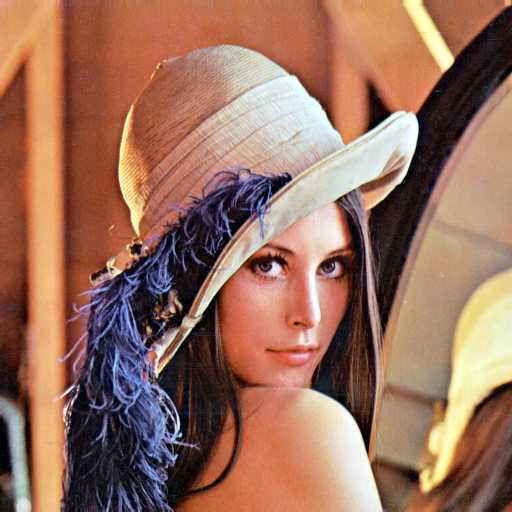

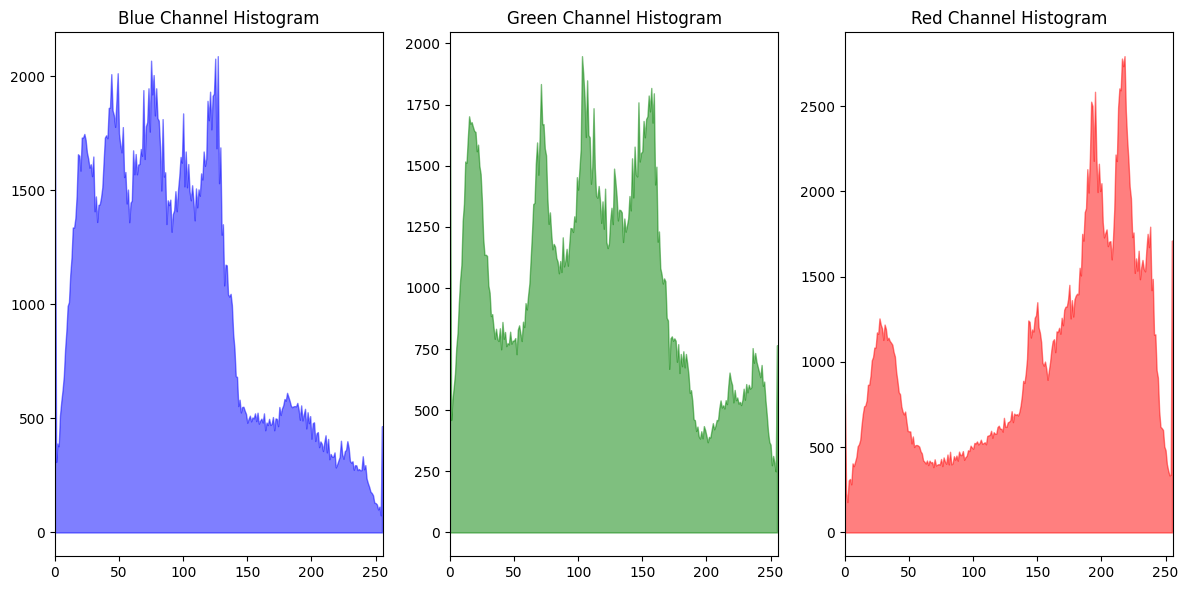

In [ ]:
# Path gambar lena.jpg di dalam drive
image_path = '/content/drive/My Drive/PCVK/images/lena.jpg'  # Sesuaikan dengan path file gambar di drive kamu

# Membaca gambar
image = cv.imread(image_path)

# Menampilkan gambar menggunakan cv2_imshow
cv2_imshow(image)

# Memisahkan gambar menjadi 3 channel (B, G, R)
blue_channel, green_channel, red_channel = cv.split(image)

# Fungsi untuk menampilkan histogram dengan area yang diisi warna
def plot_filled_histogram(image, title, color):
    histogram = cv.calcHist([image], [0], None, [256], [0, 256])
    plt.fill_between(range(256), histogram.ravel(), color=color, alpha=0.5)
    plt.xlim([0, 256])
    plt.title(title)

# Membuat plot untuk setiap channel dengan warna yang diisi
plt.figure(figsize=(12, 6))

# Histogram untuk channel biru
plt.subplot(131)
plot_filled_histogram(blue_channel, "Blue Channel Histogram", "blue")

# Histogram untuk channel hijau
plt.subplot(132)
plot_filled_histogram(green_channel, "Green Channel Histogram", "green")

# Histogram untuk channel merah
plt.subplot(133)
plot_filled_histogram(red_channel, "Red Channel Histogram", "red")

# Menampilkan plot histogram
plt.tight_layout()
plt.show()


4

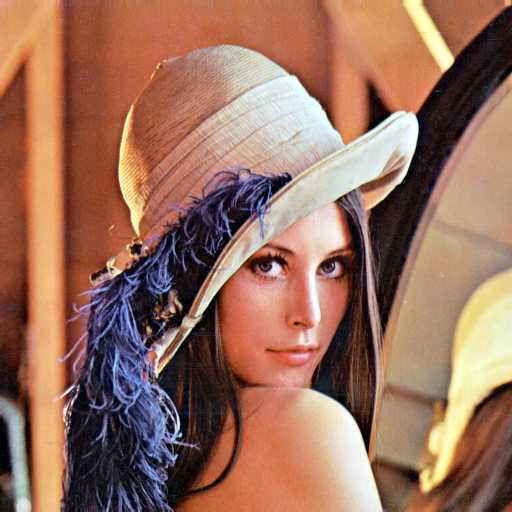

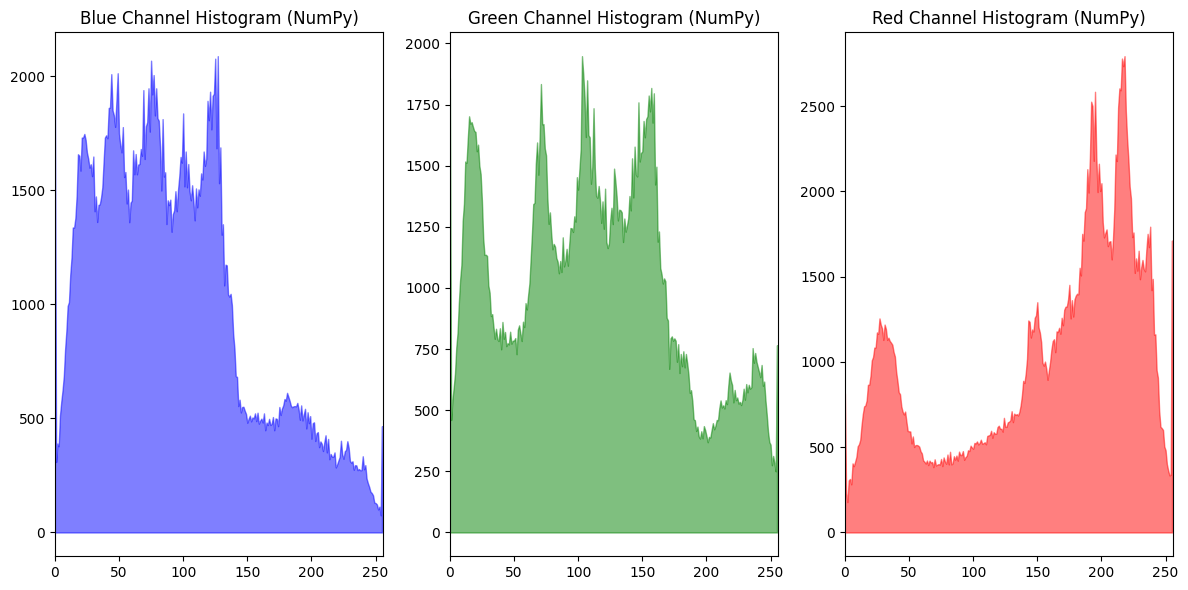

In [ ]:
# Path gambar lena.jpg di dalam drive
image_path = '/content/drive/My Drive/PCVK/images/lena.jpg'  # Sesuaikan dengan path file gambar di drive kamu

# Membaca gambar
image = cv.imread(image_path)

# Menampilkan gambar menggunakan cv2_imshow
cv2_imshow(image)

# Memisahkan gambar menjadi 3 channel (B, G, R)
blue_channel, green_channel, red_channel = cv.split(image)

# Fungsi untuk menampilkan histogram dengan NumPy
def plot_numpy_histogram(image, title, color):
    histogram, bins = np.histogram(image, bins=256, range=[0, 256])
    plt.fill_between(bins[:-1], histogram, color=color, alpha=0.5)
    plt.xlim([0, 256])
    plt.title(title)

# Membuat plot untuk setiap channel dengan NumPy
plt.figure(figsize=(12, 6))

# Histogram untuk channel biru
plt.subplot(131)
plot_numpy_histogram(blue_channel, "Blue Channel Histogram (NumPy)", "blue")

# Histogram untuk channel hijau
plt.subplot(132)
plot_numpy_histogram(green_channel, "Green Channel Histogram (NumPy)", "green")

# Histogram untuk channel merah
plt.subplot(133)
plot_numpy_histogram(red_channel, "Red Channel Histogram (NumPy)", "red")

# Menampilkan plot histogram
plt.tight_layout()
plt.show()


Iya Outputnya Sama.

5

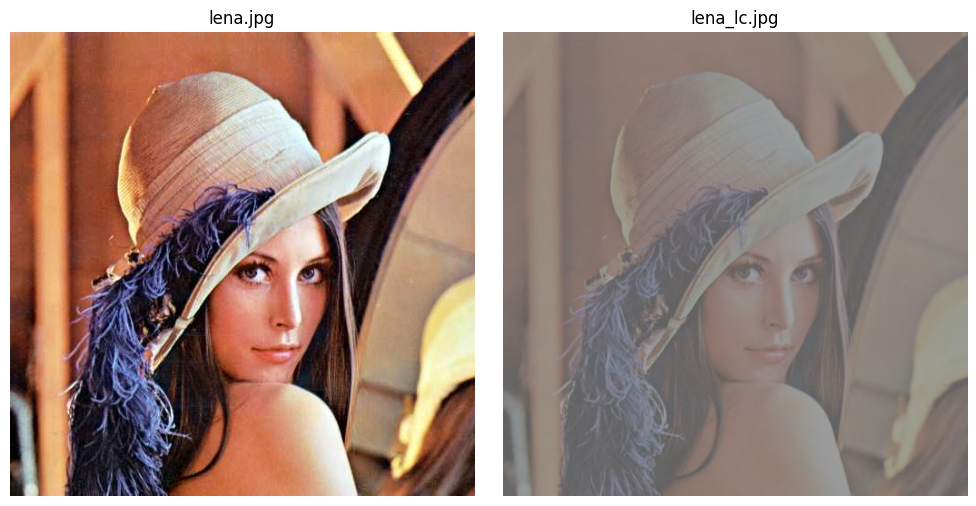

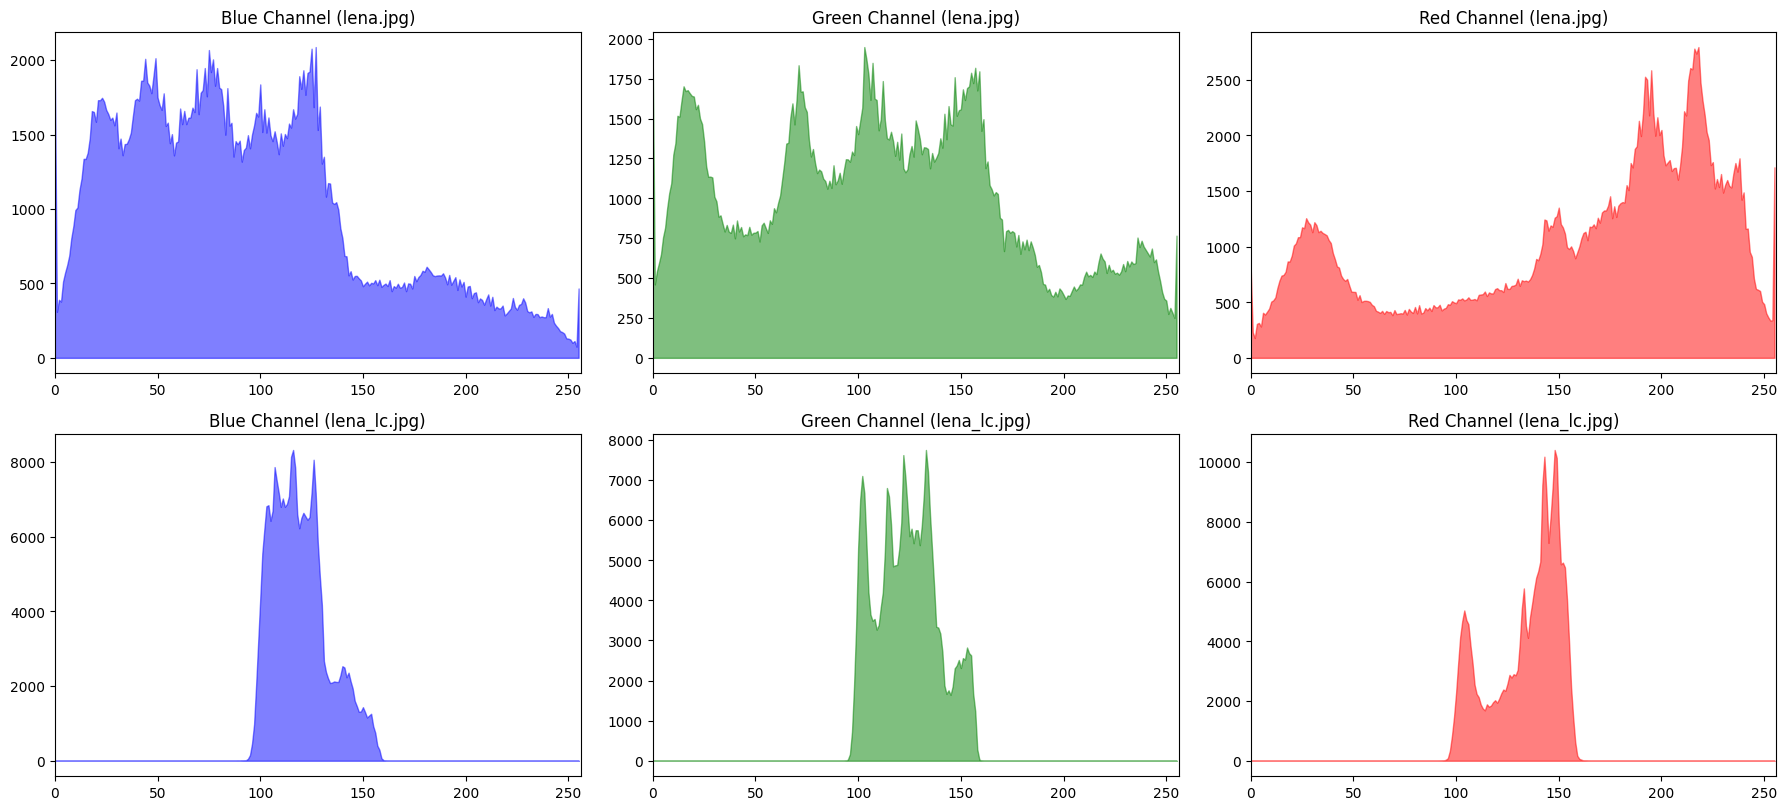

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Path untuk dua gambar yang ingin ditampilkan
image_path_lena = '/content/drive/My Drive/PCVK/images/lena.jpg'  # Sesuaikan path untuk lena.jpg
image_path_lena_lc = '/content/drive/My Drive/PCVK/images/lena_lc.jpg'  # Sesuaikan path untuk lena_lc.jpg

# Membaca kedua gambar
image_lena = cv.imread(image_path_lena)
image_lena_lc = cv.imread(image_path_lena_lc)

# Mengubah BGR menjadi RGB untuk ditampilkan dengan Matplotlib
image_lena_rgb = cv.cvtColor(image_lena, cv.COLOR_BGR2RGB)
image_lena_lc_rgb = cv.cvtColor(image_lena_lc, cv.COLOR_BGR2RGB)

# Membuat subplot untuk menampilkan kedua gambar berdampingan
plt.figure(figsize=(10, 5))

# Subplot kiri untuk gambar lena.jpg
plt.subplot(1, 2, 1)
plt.imshow(image_lena_rgb)
plt.title('lena.jpg')
plt.axis('off')  # Menghilangkan sumbu

# Subplot kanan untuk gambar lena_lc.jpg
plt.subplot(1, 2, 2)
plt.imshow(image_lena_lc_rgb)
plt.title('lena_lc.jpg')
plt.axis('off')  # Menghilangkan sumbu

# Menampilkan kedua gambar
plt.tight_layout()
plt.show()

# Fungsi untuk menghitung frekuensi, kumulatif frekuensi, dan normalisasi
def calculate_histogram_and_normalization(image_channel):
    # Menghitung histogram
    histogram, _ = np.histogram(image_channel, bins=256, range=(0, 256))

    # Menghitung kumulatif frekuensi
    cumulative_frequency = np.cumsum(histogram)

    # Menormalkan kumulatif frekuensi
    total_pixels = image_channel.size
    normalized_cumulative_frequency = cumulative_frequency / total_pixels

    # Menerapkan rumus K0 (Skala warna)
    k0 = normalized_cumulative_frequency * 255  # Skala ke 0-255

    return histogram, cumulative_frequency, normalized_cumulative_frequency, k0

# Fungsi untuk menampilkan histogram dengan area yang diisi warna
def plot_filled_histogram(histogram, title, color):
    plt.fill_between(range(256), histogram.ravel(), color=color, alpha=0.5)
    plt.xlim([0, 256])
    plt.title(title)

# Membuat subplot untuk menampilkan histogram RGB secara terpisah
plt.figure(figsize=(18, 12))

# --- Histogram untuk lena.jpg ---
# Memisahkan gambar lena.jpg menjadi 3 channel (B, G, R)
blue_channel_lena, green_channel_lena, red_channel_lena = cv.split(image_lena)

# Hitung histogram dan normalisasi untuk lena.jpg
hist_b_lena, cum_freq_b_lena, norm_cum_freq_b_lena, k0_b_lena = calculate_histogram_and_normalization(blue_channel_lena)
hist_g_lena, cum_freq_g_lena, norm_cum_freq_g_lena, k0_g_lena = calculate_histogram_and_normalization(green_channel_lena)
hist_r_lena, cum_freq_r_lena, norm_cum_freq_r_lena, k0_r_lena = calculate_histogram_and_normalization(red_channel_lena)

# Subplot untuk histogram channel biru lena.jpg
plt.subplot(3, 3, 1)
plot_filled_histogram(hist_b_lena, "Blue Channel (lena.jpg)", "blue")

# Subplot untuk histogram channel hijau lena.jpg
plt.subplot(3, 3, 2)
plot_filled_histogram(hist_g_lena, "Green Channel (lena.jpg)", "green")

# Subplot untuk histogram channel merah lena.jpg
plt.subplot(3, 3, 3)
plot_filled_histogram(hist_r_lena, "Red Channel (lena.jpg)", "red")

# --- Histogram untuk lena_lc.jpg ---
# Memisahkan gambar lena_lc.jpg menjadi 3 channel (B, G, R)
blue_channel_lena_lc, green_channel_lena_lc, red_channel_lena_lc = cv.split(image_lena_lc)

# Hitung histogram dan normalisasi untuk lena_lc.jpg
hist_b_lena_lc, cum_freq_b_lena_lc, norm_cum_freq_b_lena_lc, k0_b_lena_lc = calculate_histogram_and_normalization(blue_channel_lena_lc)
hist_g_lena_lc, cum_freq_g_lena_lc, norm_cum_freq_g_lena_lc, k0_g_lena_lc = calculate_histogram_and_normalization(green_channel_lena_lc)
hist_r_lena_lc, cum_freq_r_lena_lc, norm_cum_freq_r_lena_lc, k0_r_lena_lc = calculate_histogram_and_normalization(red_channel_lena_lc)

# Subplot untuk histogram channel biru lena_lc.jpg
plt.subplot(3, 3, 4)
plot_filled_histogram(hist_b_lena_lc, "Blue Channel (lena_lc.jpg)", "blue")

# Subplot untuk histogram channel hijau lena_lc.jpg
plt.subplot(3, 3, 5)
plot_filled_histogram(hist_g_lena_lc, "Green Channel (lena_lc.jpg)", "green")

# Subplot untuk histogram channel merah lena_lc.jpg
plt.subplot(3, 3, 6)
plot_filled_histogram(hist_r_lena_lc, "Red Channel (lena_lc.jpg)", "red")

# Menampilkan plot
plt.tight_layout()
plt.show()


6

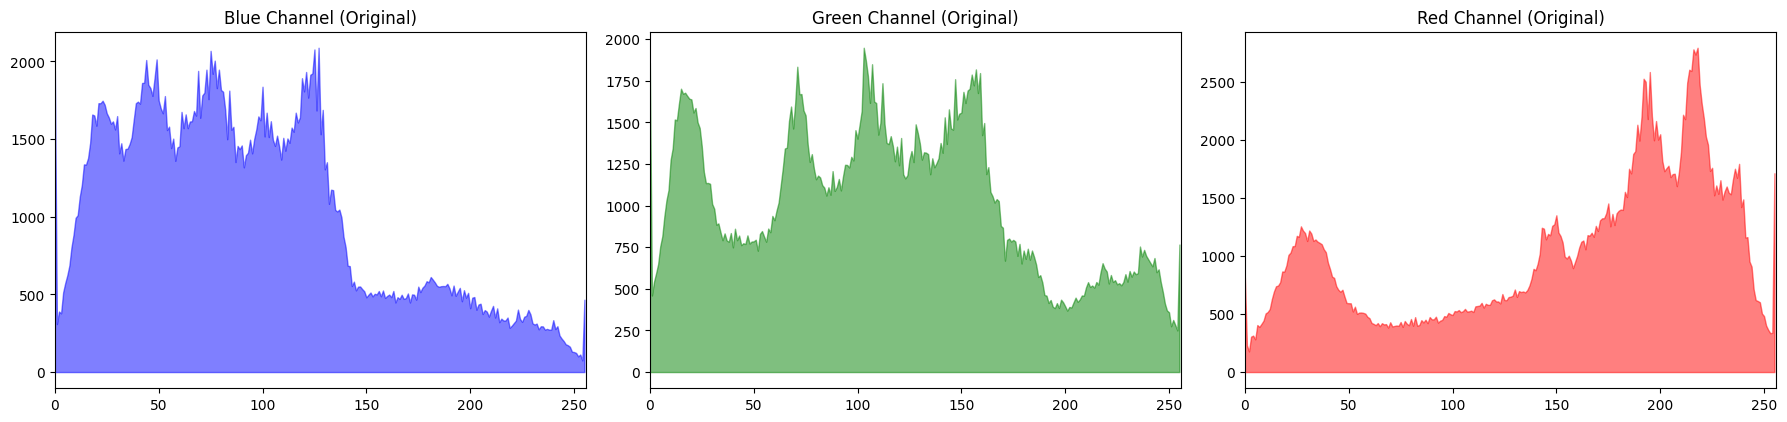

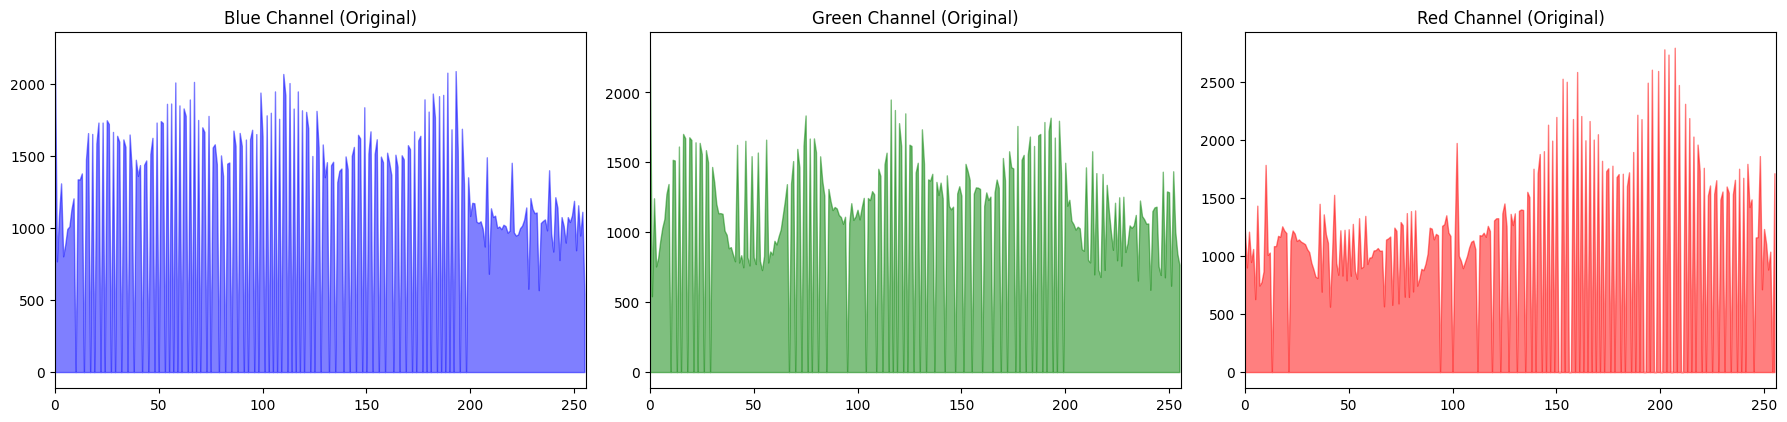

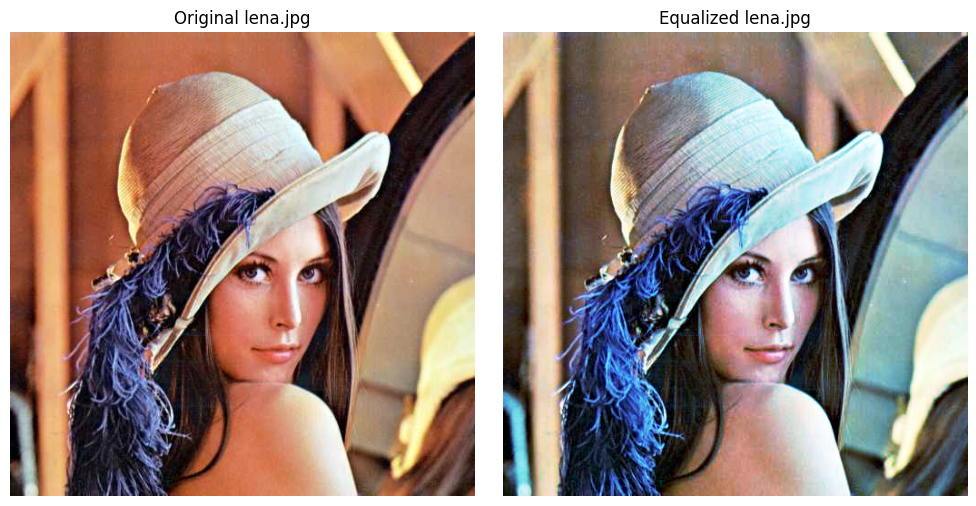

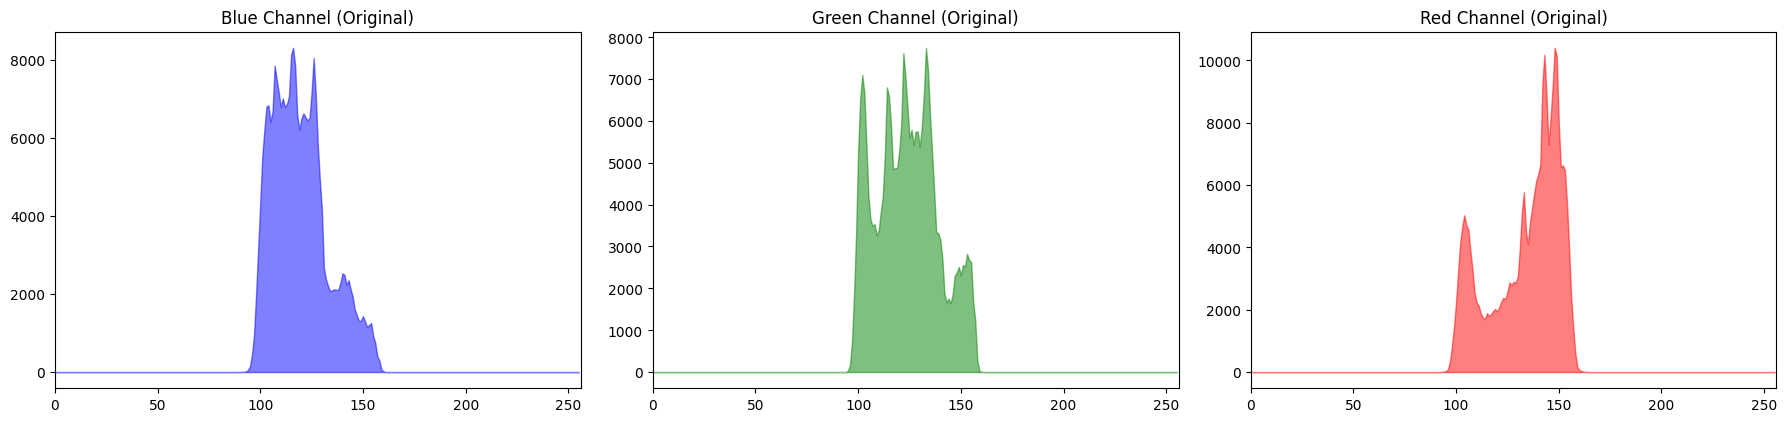

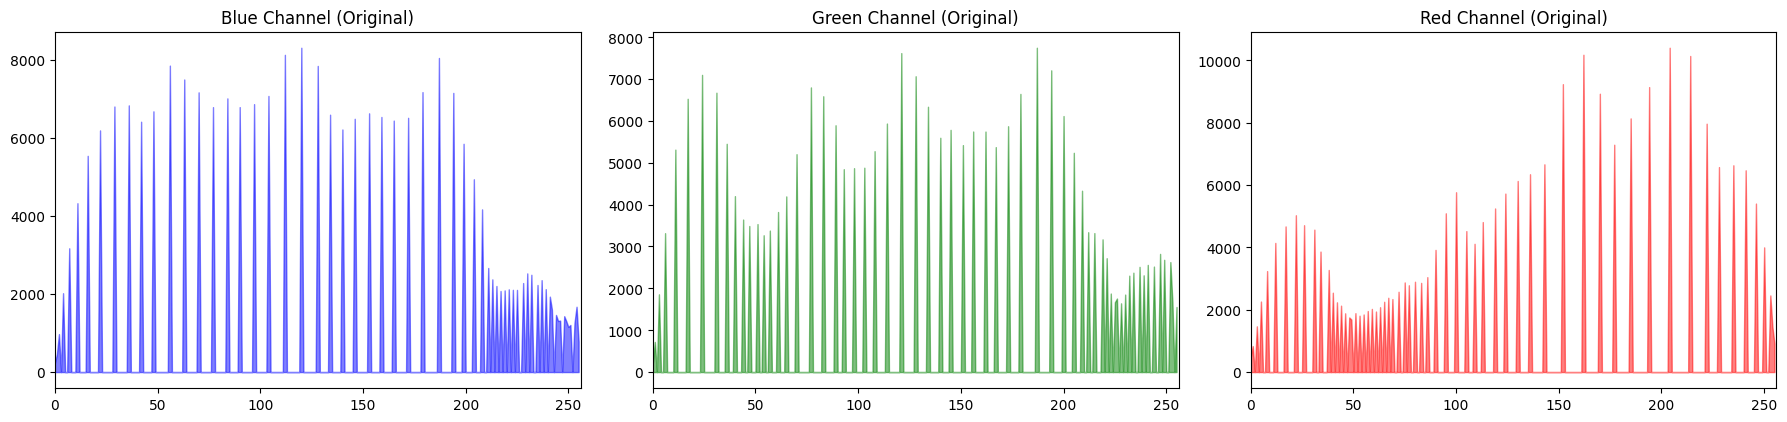

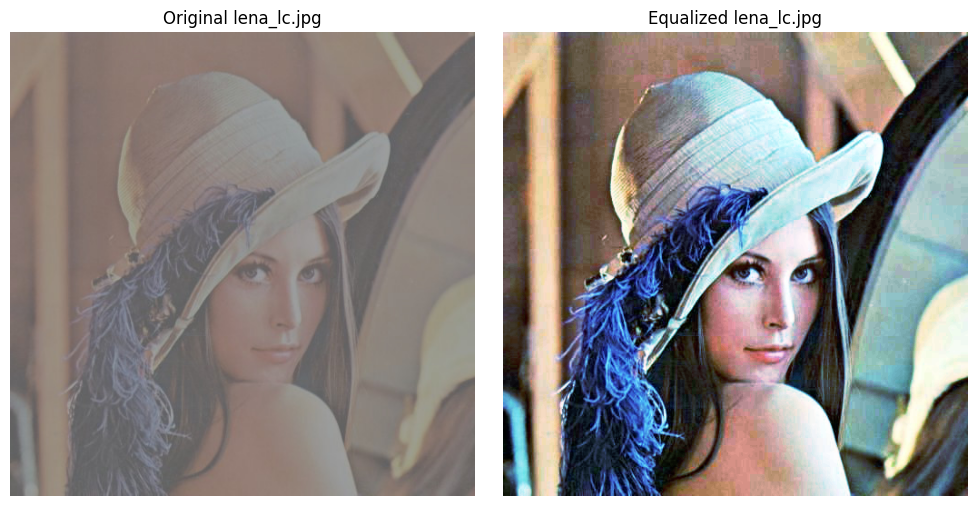

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Path untuk dua gambar yang ingin ditampilkan
image_path_lena = '/content/drive/My Drive/PCVK/images/lena.jpg'  # Sesuaikan path untuk lena.jpg
image_path_lena_lc = '/content/drive/My Drive/PCVK/images/lena_lc.jpg'  # Sesuaikan path untuk lena_lc.jpg

# Membaca kedua gambar
image_lena = cv.imread(image_path_lena)
image_lena_lc = cv.imread(image_path_lena_lc)

# Mengubah BGR menjadi RGB untuk ditampilkan dengan Matplotlib
image_lena_rgb = cv.cvtColor(image_lena, cv.COLOR_BGR2RGB)
image_lena_lc_rgb = cv.cvtColor(image_lena_lc, cv.COLOR_BGR2RGB)

# Fungsi untuk menampilkan histogram dengan area yang diisi warna
def plot_filled_histogram(histogram, title, color):
    plt.fill_between(range(256), histogram.ravel(), color=color, alpha=0.5)
    plt.xlim([0, 256])
    plt.title(title)

# Fungsi untuk melakukan histogram equalization pada setiap channel
def equalize_channels(image):
    channels = cv.split(image)
    equalized_channels = [cv.equalizeHist(channel) for channel in channels]
    return cv.merge(equalized_channels)

# Menghitung dan menampilkan histogram citra asli
def plot_histogram(image, title):
    # Memisahkan gambar menjadi 3 channel (B, G, R)
    blue_channel, green_channel, red_channel = cv.split(image)

    plt.figure(figsize=(18, 12))

    # Histogram untuk channel biru
    plt.subplot(3, 3, 1)
    hist_b = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
    plot_filled_histogram(hist_b, "Blue Channel (Original)", "blue")

    # Histogram untuk channel hijau
    plt.subplot(3, 3, 2)
    hist_g = cv.calcHist([green_channel], [0], None, [256], [0, 256])
    plot_filled_histogram(hist_g, "Green Channel (Original)", "green")

    # Histogram untuk channel merah
    plt.subplot(3, 3, 3)
    hist_r = cv.calcHist([red_channel], [0], None, [256], [0, 256])
    plot_filled_histogram(hist_r, "Red Channel (Original)", "red")

    plt.tight_layout()
    plt.show()

# Menampilkan histogram citra asli untuk lena.jpg
plot_histogram(image_lena, "Histogram - lena.jpg")

# Melakukan histogram equalization untuk lena.jpg
equalized_image_lena = equalize_channels(image_lena)

# Menampilkan histogram citra setelah equalization untuk lena.jpg
plot_histogram(equalized_image_lena, "Histogram - Equalized lena.jpg")

# Menampilkan citra asli dan citra setelah equalization untuk lena.jpg
plt.figure(figsize=(10, 5))

# Subplot kiri untuk gambar asli lena.jpg
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image_lena, cv.COLOR_BGR2RGB))
plt.title('Original lena.jpg')
plt.axis('off')

# Subplot kanan untuk gambar setelah equalization lena.jpg
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image_lena, cv.COLOR_BGR2RGB))
plt.title('Equalized lena.jpg')
plt.axis('off')

plt.tight_layout()
plt.show()

# Menampilkan histogram citra asli untuk lena_lc.jpg
plot_histogram(image_lena_lc, "Histogram - lena_lc.jpg")

# Melakukan histogram equalization untuk lena_lc.jpg
equalized_image_lena_lc = equalize_channels(image_lena_lc)

# Menampilkan histogram citra setelah equalization untuk lena_lc.jpg
plot_histogram(equalized_image_lena_lc, "Histogram - Equalized lena_lc.jpg")

# Menampilkan citra asli dan citra setelah equalization untuk lena_lc.jpg
plt.figure(figsize=(10, 5))

# Subplot kiri untuk gambar asli lena_lc.jpg
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image_lena_lc, cv.COLOR_BGR2RGB))
plt.title('Original lena_lc.jpg')
plt.axis('off')

# Subplot kanan untuk gambar setelah equalization lena_lc.jpg
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image_lena_lc, cv.COLOR_BGR2RGB))
plt.title('Equalized lena_lc.jpg')
plt.axis('off')

plt.tight_layout()
plt.show()


Tidak. Hasilnya beda, histogram equalizeHist ada renggangan yang artinya warna pada pixel tertentu yang diconvert ke tetangganya

7.

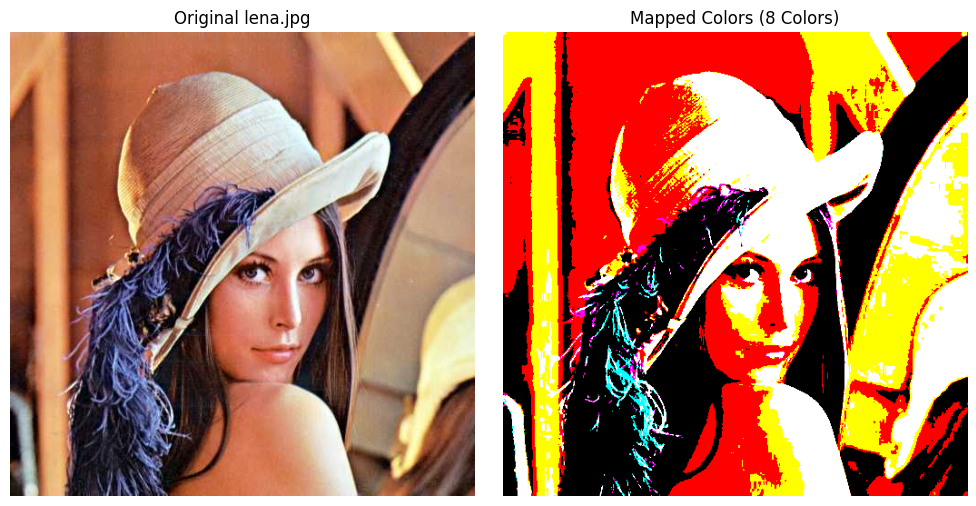

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Path untuk gambar yang akan diproses
image_path_lena = '/content/drive/My Drive/PCVK/images/lena.jpg'  # Sesuaikan path untuk lena.jpg

# Membaca gambar
image_lena = cv.imread(image_path_lena)

# Definisikan 8 warna (hitam, hijau, kuning, biru, cyan, magenta, putih) dalam format RGB
color_mapping = {
    'black': (0, 0, 0),
    'green': (0, 255, 0),
    'yellow': (255, 255, 0),
    'blue': (0, 0, 255),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'white': (255, 255, 255),
}

# Fungsi untuk memetakan warna
def map_colors(image):
    # Buat gambar kosong dengan ukuran yang sama
    mapped_image = np.zeros_like(image)

    # Ubah gambar ke format float untuk menghitung jarak
    image_float = image.astype(float)

    # Loop untuk setiap warna yang ingin dipetakan
    for color_name, target_color in color_mapping.items():
        # Hitung jarak Euclidean dari setiap piksel ke target_color
        distances = np.sqrt(np.sum((image_float - target_color) ** 2, axis=2))
        # Buat mask untuk piksel yang lebih dekat ke target_color
        mask = distances < np.sqrt(np.sum((image_float - mapped_image) ** 2, axis=2))
        # Ganti warna pada piksel yang lebih dekat dengan target_color
        mapped_image[mask] = target_color

    return mapped_image

# Lakukan pemetaan warna pada gambar
mapped_image_lena = map_colors(image_lena)

# Tampilkan gambar asli dan gambar yang telah dipetakan
plt.figure(figsize=(10, 5))

# Subplot kiri untuk gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image_lena, cv.COLOR_BGR2RGB))
plt.title('Original lena.jpg')
plt.axis('off')

# Subplot kanan untuk gambar yang telah dipetakan
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(mapped_image_lena, cv.COLOR_BGR2RGB))
plt.title('Mapped Colors (8 Colors)')
plt.axis('off')

plt.tight_layout()
plt.show()


8.

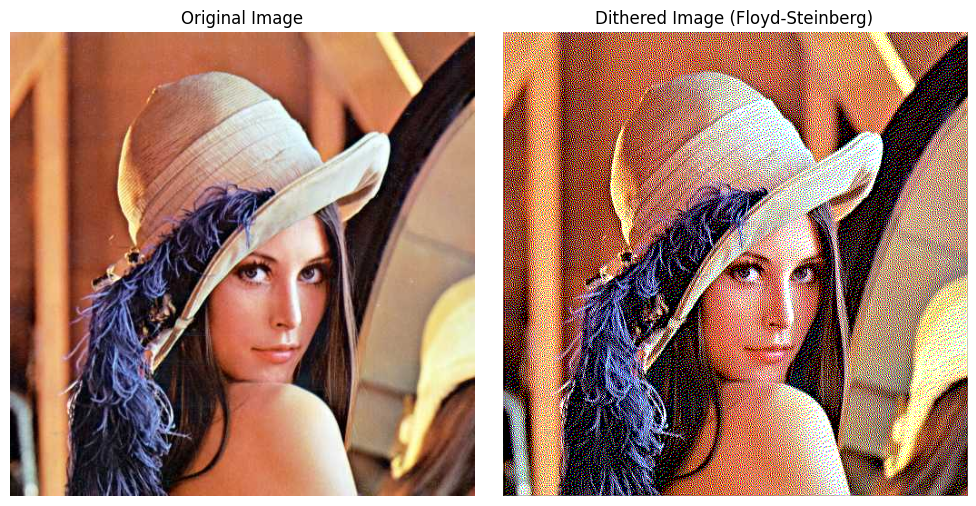

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Path untuk gambar yang akan diproses
image_path = '/content/drive/My Drive/PCVK/images/lena.jpg'  # Menggunakan gambar yang diunggah

# Membaca gambar
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Ubah BGR ke RGB

# Fungsi threshold untuk memastikan nilai piksel tetap dalam rentang [0, 255]
def threshold(value):
    np.clip(value, 0, 255, out=value)
    return value

# Fungsi untuk melakukan dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    height, width, _ = image.shape
    img_dithered = image.copy().astype(np.float32)  # Salin gambar asli untuk modifikasi

    for y in range(height - 1):
        for x in range(1, width - 1):
            pixel_old = img_dithered[y, x].copy()

            pixel_distance = 1  # Menentukan jarak piksel (dalam kasus ini tetap 1)
            new_pixel = np.round(pixel_distance * pixel_old / 255.0) * (255 / pixel_distance)
            img_dithered[y, x] = new_pixel

            # Menghitung kesalahan (error) dari piksel lama ke piksel baru
            error = pixel_old - new_pixel

            # Menyebarkan kesalahan ke piksel yang berdekatan
            img_dithered[y, x + 1] += error * 7 / 16  # Piksel di kanan
            img_dithered[y + 1, x - 1] += error * 3 / 16  # Piksel di kiri bawah
            img_dithered[y + 1, x] += error * 5 / 16  # Piksel di bawah
            img_dithered[y + 1, x + 1] += error * 1 / 16  # Piksel di kanan bawah

            # Terapkan threshold untuk memastikan nilai piksel tetap dalam rentang [0, 255]
            img_dithered[y, x + 1] = threshold(img_dithered[y, x + 1])
            img_dithered[y + 1, x - 1] = threshold(img_dithered[y + 1, x - 1])
            img_dithered[y + 1, x] = threshold(img_dithered[y + 1, x])
            img_dithered[y + 1, x + 1] = threshold(img_dithered[y + 1, x + 1])

    return img_dithered.astype(np.uint8)

# Melakukan dithering pada gambar yang diunggah
dithered_image = floyd_steinberg_dithering(image.copy())

# Tampilkan gambar asli dan gambar setelah dithering
plt.figure(figsize=(10, 5))

# Subplot kiri untuk gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Subplot kanan untuk gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(dithered_image)  # Menampilkan dithered image dalam RGB
plt.title('Dithered Image (Floyd-Steinberg)')
plt.axis('off')

plt.tight_layout()
plt.show()


9.

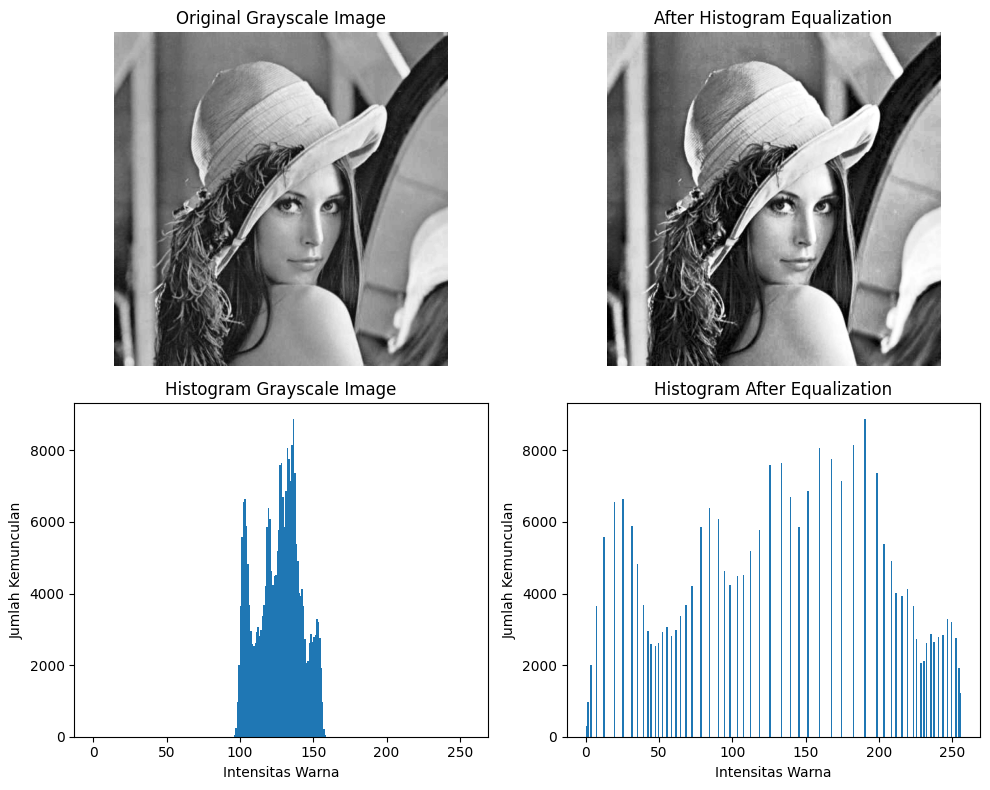

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Path gambar lena_lc
image_path = '/content/drive/My Drive/PCVK/images/lena_lc.jpg'

# Membaca gambar dan mengubahnya ke grayscale
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Histogram equalization pada gambar grayscale
equalized_image = cv.equalizeHist(image)

# Fungsi untuk menampilkan histogram
def plot_histogram(image, ax, title):
    ax.hist(image.ravel(), bins=256, range=[0, 256])
    ax.set_title(title)
    ax.set_xlabel('Intensitas Warna')
    ax.set_ylabel('Jumlah Kemunculan')

# Menampilkan hasil gambar original dan hasil histogram equalization
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Subplot kiri atas: Gambar grayscale asli
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Grayscale Image')
axs[0, 0].axis('off')

# Subplot kanan atas: Hasil histogram equalization
axs[0, 1].imshow(equalized_image, cmap='gray')
axs[0, 1].set_title('After Histogram Equalization')
axs[0, 1].axis('off')

# Subplot kiri bawah: Histogram dari gambar grayscale asli
plot_histogram(image, axs[1, 0], 'Histogram Grayscale Image')

# Subplot kanan bawah: Histogram dari gambar equalized
plot_histogram(equalized_image, axs[1, 1], 'Histogram After Equalization')

plt.tight_layout()
plt.show()
